# [Regression] : Video Game Sales with Ratings

<사용 데이터> 
- Video_Games_Sales_as_at_22_Dec_2016.csv

<스키마>
- Country : 국가
- Region : 국가의 지역
- Happiness Rank : 행복지수 순위
- Happiness Score : 행복지수 점수

- [source] : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings?select=Video_Games_Sales_as_at_22_Dec_2016.csv

------------------

# 1. 모듈 및 데이터 호출

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### ▼ 결측치 제거

In [60]:
print(df.shape)
df.isnull().sum()

(16719, 16)


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [61]:
df.dropna(inplace=True)
df.shape

(6825, 16)

----------------

## 수치형 데이터의 히스토그램 확인

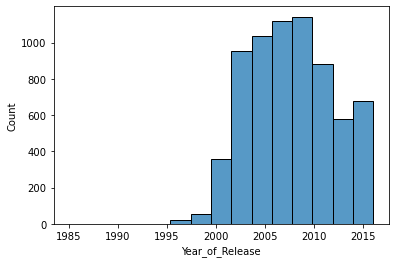

In [62]:
sns.histplot(x='Year_of_Release', data=df, bins=15)

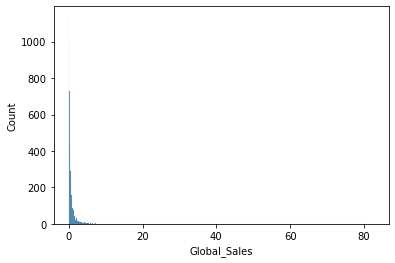

In [63]:
sns.histplot(x='Global_Sales', data=df)

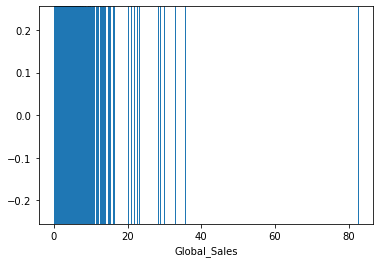

In [64]:
sns.rugplot(x='Global_Sales', data=df, height=1)

In [65]:
df[df['Global_Sales'] > 40]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


▼ 이상치 제거

In [66]:
# 상위 1% 매출 기준
gs1 = df['Global_Sales'].quantile(0.99)
print(gs1)

7.167600000000002


In [67]:
df = df[df['Global_Sales'] < gs1]

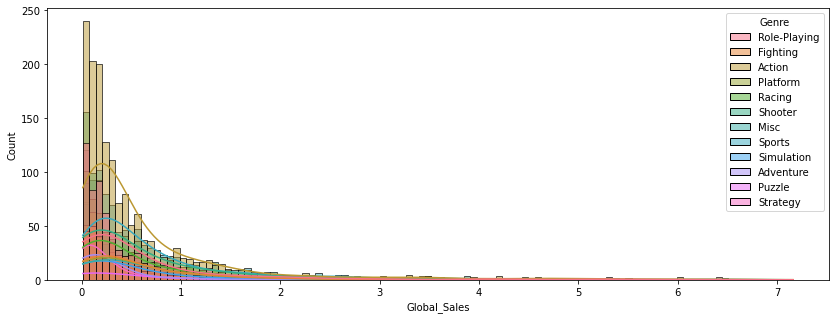

In [68]:
# 이상치 제거하고 다시 그리기

plt.figure(figsize=(14,5))
sns.histplot(x='Global_Sales', data=df, hue='Genre', kde=True)

In [69]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

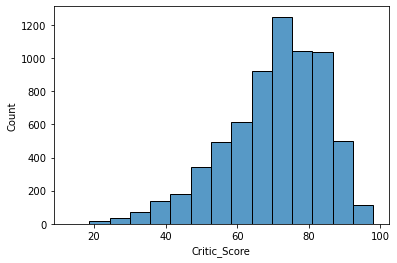

In [70]:
sns.histplot(x='Critic_Score', data=df, bins=15)

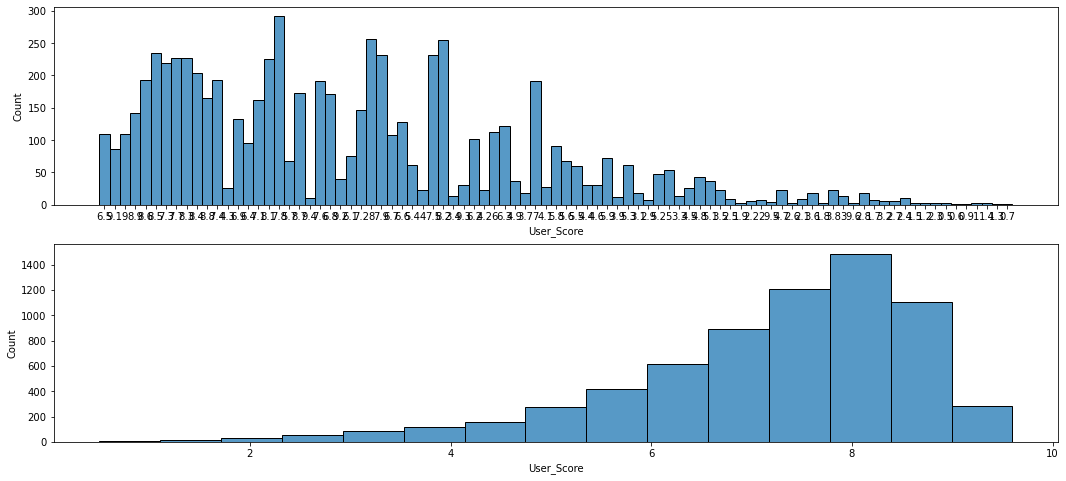

In [71]:

figure, (ax1, ax2) = plt.subplots(nrows=2)
figure.set_size_inches(18,8)

sns.histplot(x='User_Score', data=df, bins=15, ax=ax1)

# float으로 형변환
sns.histplot(data=df['User_Score'].apply(float), bins=15, ax=ax2)    

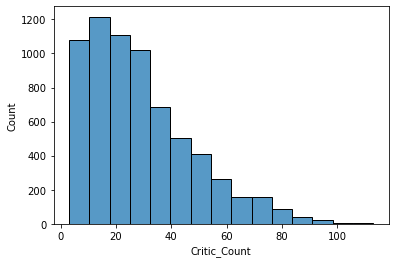

In [72]:
sns.histplot(x='Critic_Count', data=df, bins=15)

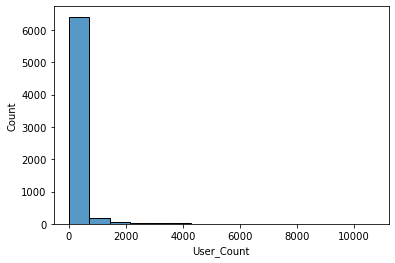

In [73]:
sns.histplot(x='User_Count', data=df, bins=15)

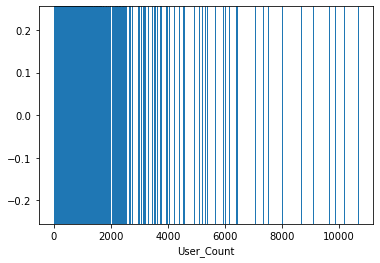

In [74]:
sns.rugplot(x='User_Count', data=df, height=1)

In [75]:
uc = df['User_Count'].quantile(0.960235)
print(uc)

911.5496999999996


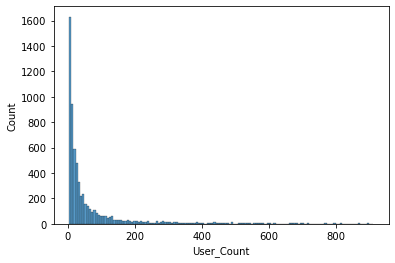

In [76]:
df = df[df['User_Count']<uc]
sns.histplot(data=df, x='User_Count')

# 수치형 데이터와 전국 판매량의 Jointplot 분석하기

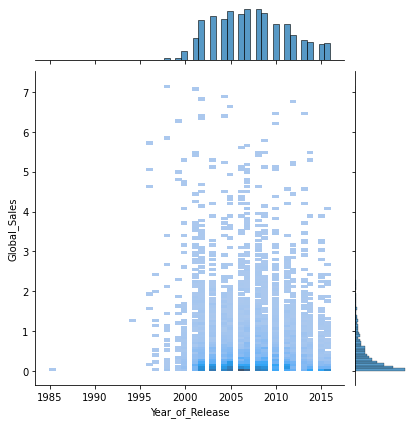

In [77]:
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist')

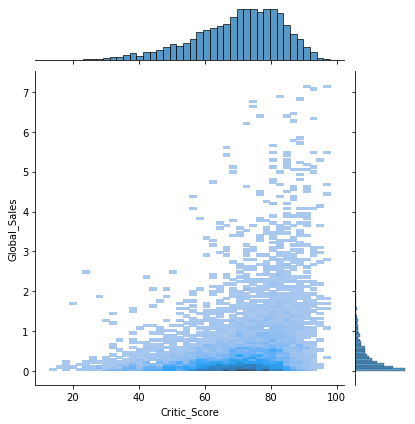

In [78]:
# 상관관계 보임. 평가 점수가 높으면 대체적으로 잘 팔리는 편

sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist')

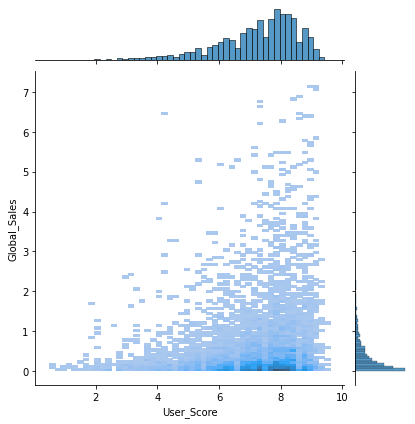

In [79]:
df['User_Score'] = df['User_Score'].apply(float)

sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist')

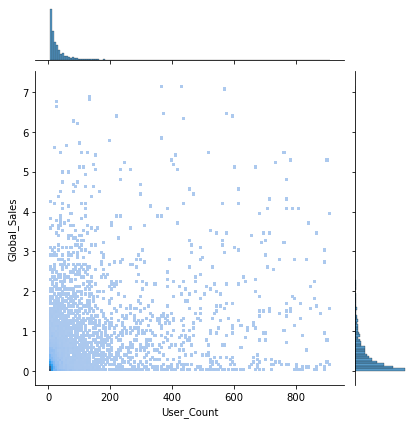

In [80]:
sns.jointplot(x='User_Count', y='Global_Sales', data=df, kind='hist')

# 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

In [81]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

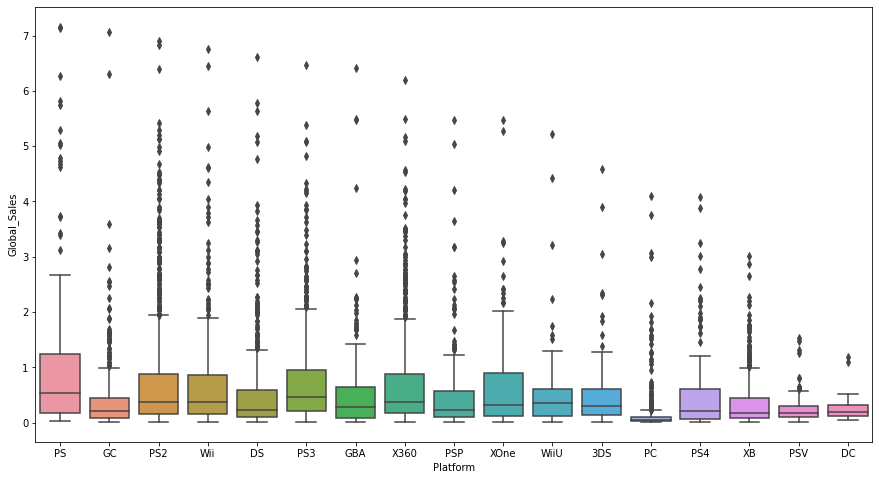

In [82]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

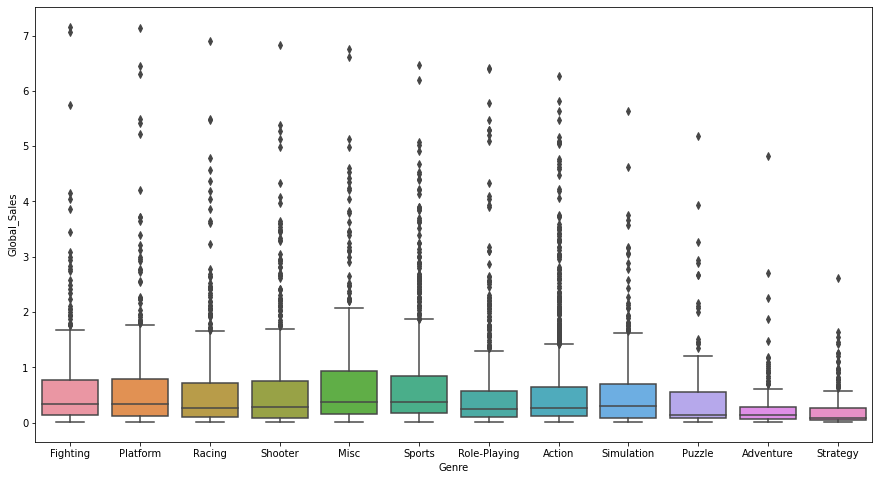

In [83]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

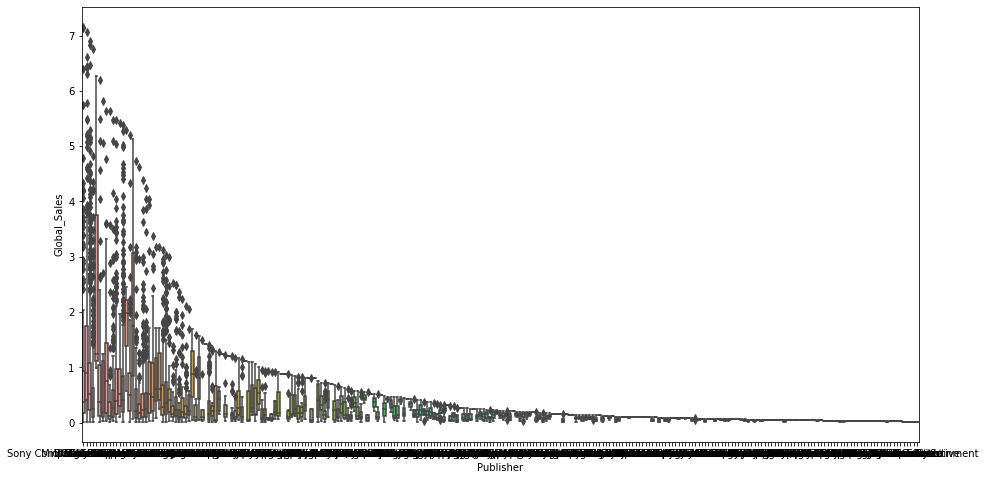

In [84]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)

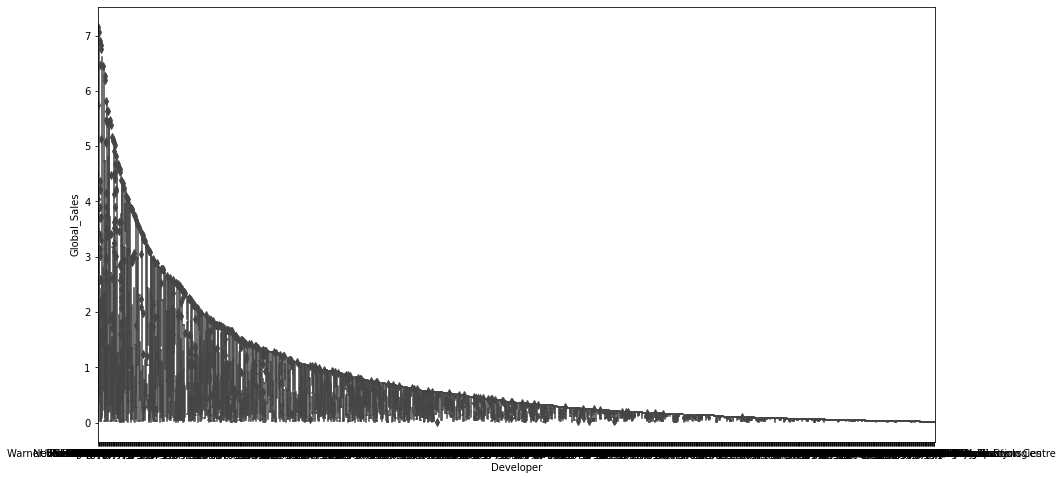

In [85]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Developer', y='Global_Sales', data=df)

# 전문가 평점과 사용자 평점의 차이 분석하기

### 서로 다른 칼럼의, 서로 다른 스케일의 데이터로 박스플롯 그리기

In [86]:
critic_Score = df[['Critic_Score']].copy()
critic_Score.rename({'Critic_Score' : 'Score'}, axis=1, inplace=True)
critic_Score['ScoreBy'] = 'Critics'
critic_Score.head()

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics


In [87]:
# 유저 스코어의 단위는 10점 만점이기 때문에 스케일을 맞춰주기 위해 X10 수행
User_Score = df[['User_Score']].copy()*10
User_Score.rename({'User_Score' : 'Score'}, axis=1, inplace=True)
User_Score['ScoreBy'] = 'User'
User_Score.head()

,Score,ScoreBy
106,91.0,User
109,89.0,User
111,91.0,User
113,86.0,User
114,85.0,User


In [88]:
scores = pd.concat([critic_Score, User_Score], axis=0)
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,User
16677,88.0,User
16696,76.0,User
16700,58.0,User


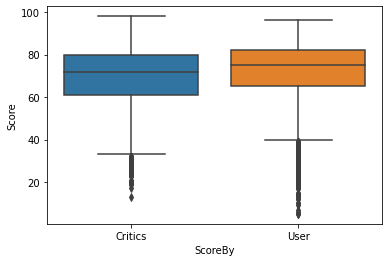

In [89]:
sns.boxplot(data=scores, x='ScoreBy', y='Score')

#### 일반적으로 전문가 평점이 박한 편

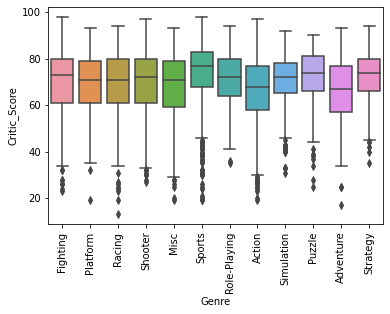

In [90]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

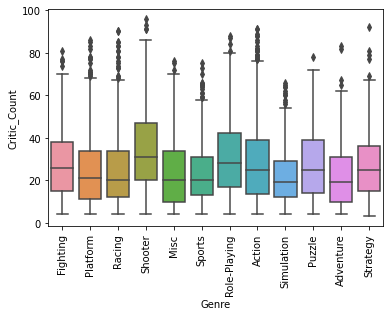

In [91]:
sns.boxplot(x='Genre', y='Critic_Count', data=df)
plt.xticks(rotation=90)
plt.show()

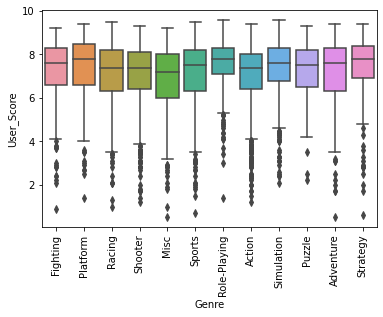

In [92]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

# 수치형 데이터간의 상관성 시각화하기

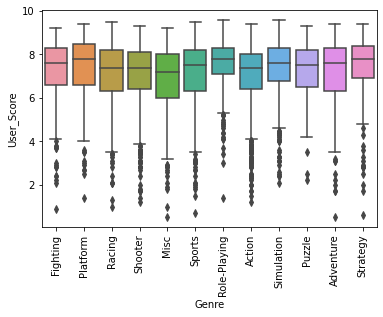

In [93]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

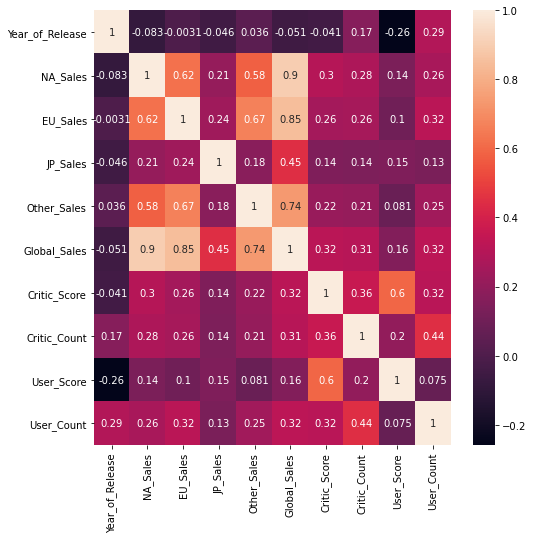

In [94]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True)

# 모델 학습을 위한 전처리

In [95]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

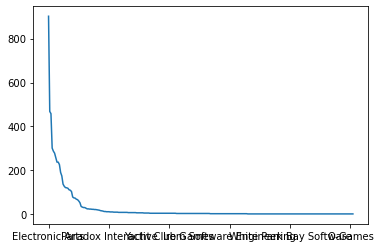

In [96]:
pb = df['Publisher'].value_counts()
pb.plot()

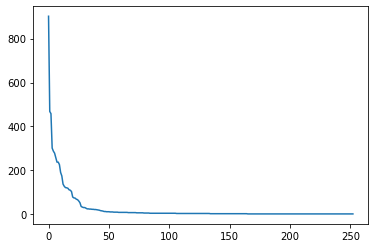

In [97]:
plt.plot(range(len(pb)), pb)

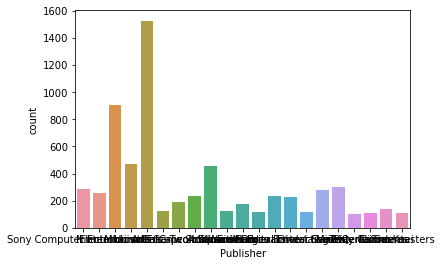

In [98]:
df['Publisher'] = df['Publisher'].apply(lambda x : x if x not in pb[20:] else 'others')


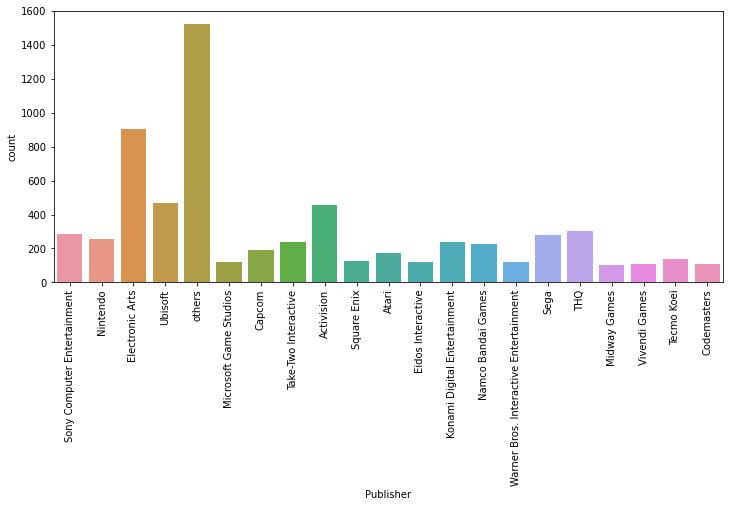

In [102]:
plt.figure(figsize=(12,5))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

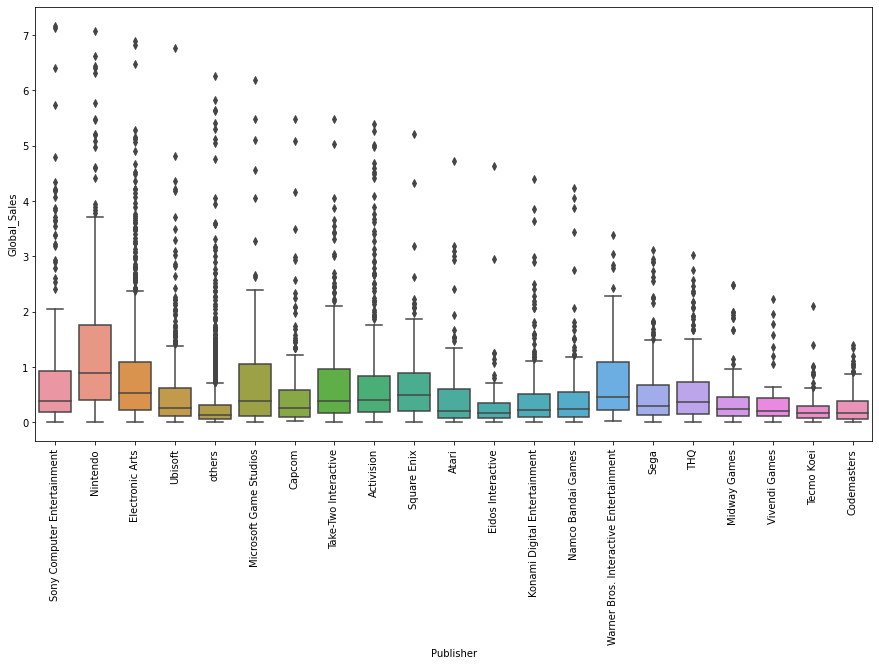

In [104]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

#### Developer

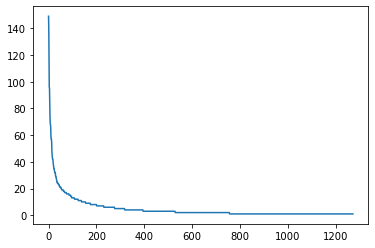

In [109]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)),dev)

In [110]:
df['Developer'] = df['Developer'].apply(lambda x : x if x not in dev[20:] else 'others')

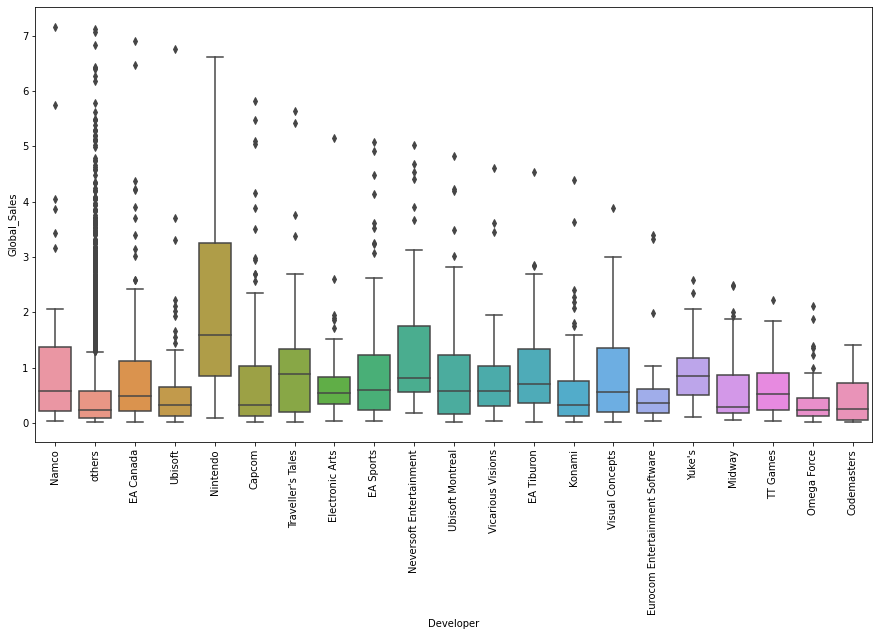

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

# 범주형 데이터 전처리

### get_dummies를 이용한 범주형 데이터 전처리

In [118]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16696,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 전국 판매량 Regression 모델 학습하기

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
X_num=df[['Year_of_Release', 'Critic_Count', 'User_Score']]

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [125]:
X.head()

,Year_of_Release,Critic_Count,User_Score,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,-0.704478,1.346582,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
109,-2.237912,-0.874440,1.206587,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,-1.514757,0.598567,1.346582,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.655221,0.996594,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114,-1.273706,0.088680,0.926597,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## XGBoost 모델 생성/학습 시키기

In [127]:
from xgboost import XGBRegressor

In [128]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## LinearRegression 모델 생성/학습 시키기

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

# 결과 확인하기

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [132]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

In [134]:
print('XGB MAE : ', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE : ', sqrt(mean_absolute_error(y_test, pred_xgb)))

print('LinearRegression MAE : ', mean_absolute_error(y_test, pred_lr))
print('LinearRegression RMSE : ', sqrt(mean_absolute_error(y_test, pred_lr)))

XGB MAE :  0.43438735774809945
XGB RMSE :  0.6590806913786046
LinearRegression MAE :  0.4477752020145194
LinearRegression RMSE :  0.6691600720414507


# scatter plot 시각화

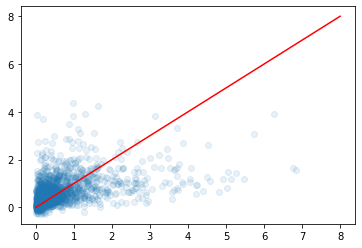

In [137]:
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0,8], [0,8], 'r-')

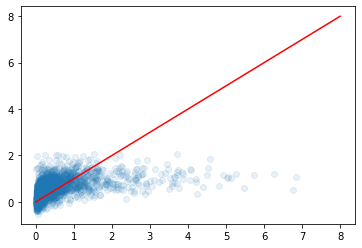

In [138]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0,8], [0,8], 'r-')

# feature importances 시각화

<BarContainer object of 50 artists>

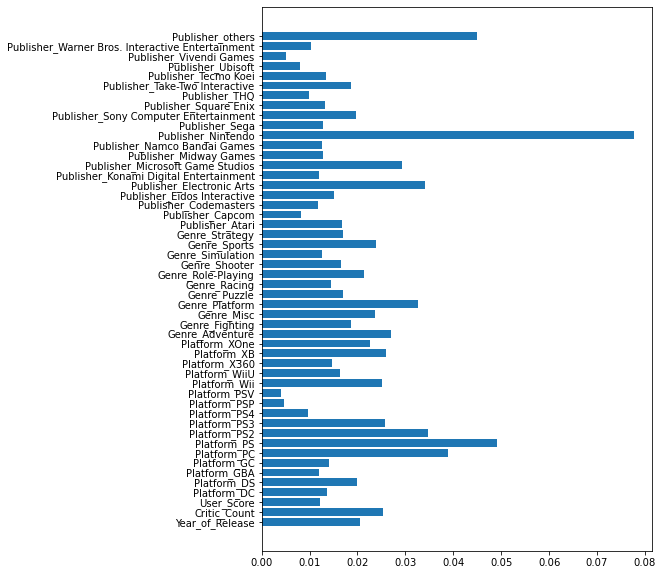

In [148]:
plt.figure(figsize=(7,10))
plt.barh(X.columns, model_xgb.feature_importances_)

In [ ]:
plt.figure(figsize=(7,10))
plt.barh(X.columns, model_xgb.feature_importances_)

<Figure size 504x7200 with 0 Axes>

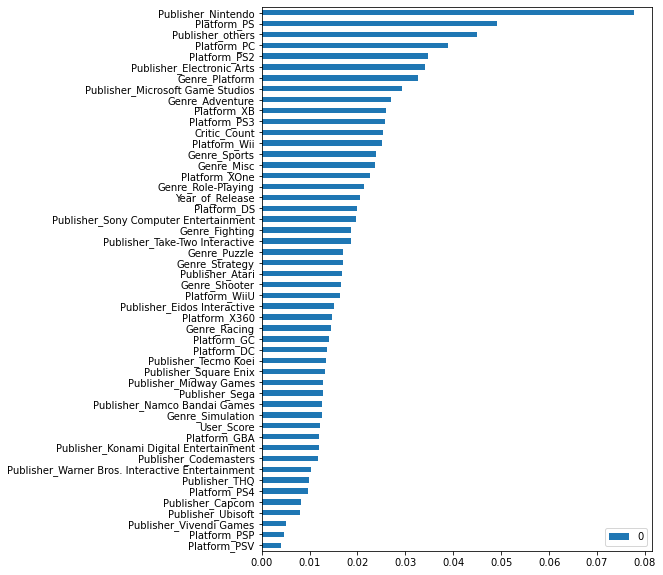

In [166]:
pd.DataFrame(model_xgb.feature_importances_, index=X.columns).sort_values(by=0, ascending=True).plot.barh(figsize=(7,10))
plt.show()

# User Score 예측하기

In [190]:
X_num=df[['Year_of_Release', 'Critic_Count', 'Critic_Score']]

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['User_Score']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [192]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [194]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

In [195]:
print('XGB MAE : ', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE : ', sqrt(mean_absolute_error(y_test, pred_xgb)))

print('LinearRegression MAE : ', mean_absolute_error(y_test, pred_lr))
print('LinearRegression RMSE : ', sqrt(mean_absolute_error(y_test, pred_lr)))

XGB MAE :  0.7892905228310632
XGB RMSE :  0.8884202399940375
LinearRegression MAE :  0.7799571370913108
LinearRegression RMSE :  0.883151819955839


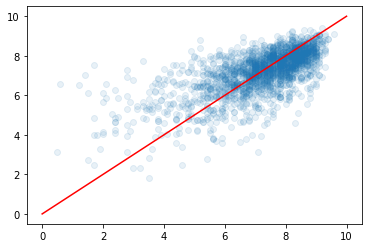

In [198]:
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0,10], [0,10], 'r-')

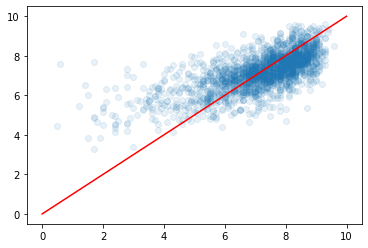

In [199]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0,10], [0,10], 'r-')

# feature importances 시각화

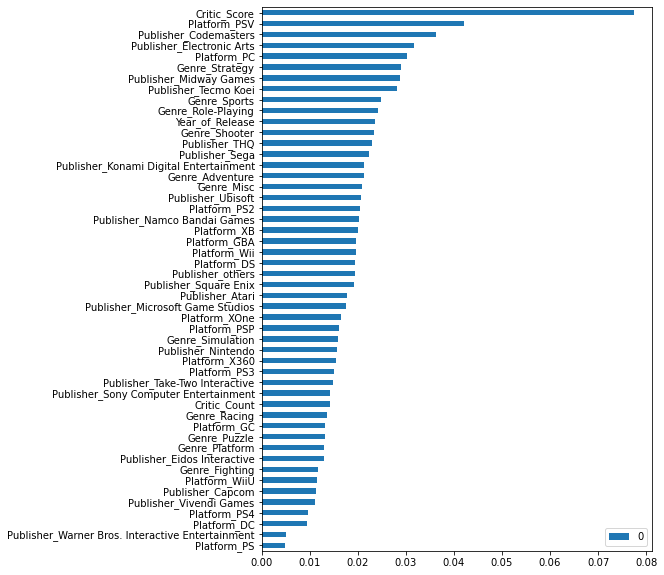

In [200]:
pd.DataFrame(model_xgb.feature_importances_, index=X.columns).sort_values(by=0, ascending=True).plot.barh(figsize=(7,10))
plt.show()